In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math as m
from mpl_toolkits.mplot3d import Axes3D
from VerletSolver import VerletSolver as VS
#from Planet import Planet

In [2]:
class Planet():
    def __init__(self, name="Planet X", mass=1, coordinates=[1,0,0], velocity=[0,0,0]):
        self.mass = mass
        self.name = name
        self.coordinates = coordinates
        self.x = coordinates[0]
        self.y = coordinates[1]
        self.z = coordinates[2]
        self.velocity = velocity
        self.vx = velocity[0]
        self.vy = velocity[1]
        self.vz = velocity[2]
        self.r = self.orbit_radius()
        self.velocity_mag = (self.vx**2 + self.vy**2 + self.vz**2)**(0.5)
        self.position = (self.x,self.y,self.z)

    def orbit_radius(self):
        return (self.x**2+self.y**2+self.z**2)**(0.5)
    
    def distance(self, other_planet):
        return ((self.x-other_planet.x)**2 + (self.y-other_planet.y)**2 + (self.z-other_planet.z)**2)**(0.5)
    
    def kinetic_energy(self):
        return (.5*self.mass*((self.vx)**2 + (self.vy)**2 + (selfv.z)**2))
    
    def potential_energy(self, other_planet):
        G=1
        return G*self.mass*other_planet.mass/(self.distance(other_planet))
        
    def angular_momentum(self, other_planet):
        return mass*self.distance(other_planet)*self.velocity_mag
    
    

In [ ]:
import math as m

class VerletSolver():
    def __init__(self, h, time):
        
        self.h = h
        self.time = time
        
    def coordinate(xi,h,vi,ai):
        return xi + h*vi + h**2*ai/2

    def velocity(vi,h,a_i_1, a_i):
        return vi + (h/2)*(a_i_1+a_i)

    def acceleration(coord, dist):
        return -4*coord*m.pi**2/(dist**3)
    
    def kinetic_energy(planet):
        return (.5*planet.mass*((planet.vx)**2 + (planet.vy)**2 + (planet.vz)**2))
    
    def potential_energy(planet, other_planet):
        G=1
        return G*planet.mass*other_planet.mass/(planet.distance(other_planet))
    
    def angular_momentum(planet, other_planet):
        return mass*planet.distance(other_planet)*planet.velocity_mag
        
        

In [8]:
#position -> velocity

#def positions(planet):
#
def Solve(planet, years, h, n, pos_coordinates, velo_vectors):

    for j in range(len(pos_coordinates)):
        
        coord_array = pos_coordinates[j]
        velo_array = velo_vectors[j]
        #coord_array = np.zeros(n+1)
        #velo_array = np.zeros(n+1)
        coord_array[0] = planet.coordinates[j]
        velo_array[0] = planet.velocity[j]

        for i in range(n):
            
            #initialize variables
            c_i = coord_array[i]
            v_i = velo_array[i]

            #use VS to calculate acceleration, then position, then velocity
            a_i = VS.acceleration(c_i, planet.r)
            c_i_1 = VS.coordinate(c_i,h,v_i,a_i)
            coord_array[i+1] = c_i_1
            a_i_1 = VS.acceleration(c_i_1, planet.r)
            v_i_1 = VS.velocity(v_i,h,a_i_1,a_i)
            velo_array[i+1] = v_i_1
            
            #update planet attributes
            planet.coordinates[j] = c_i_1
            planet.velocity[j] = v_i_1

        
planet_names = ["Sun", "Mercury", "Venus", "Earth", "Mars", "Saturn", "Uranus", "Neptune", "Pluto"]
mass_sun = 1.99E30
#planet_vars = [sun, mercury, earth, mars, saturn, uranus, neptune, pluto]
earth = Planet("Earth", 6.00*10**24/mass_sun,[-9.882510901700633E-01, 8.499778853173919E-02, -1.519972828171497E-04],
              [-1.680240369278054E-03, -1.719988462359221E-02, 4.349840395398017E-07])
#plt.plot(np.arange(n+1),coord_array)
#print(velo_array[:])
years = 3
h = 1/365
p = earth
n = int(years/h)
x_y_z = [np.zeros(n+1),np.zeros(n+1),np.zeros(n+1)]
vx_vy_vz = [np.zeros(n+1),np.zeros(n+1),np.zeros(n+1)]
x,y,z = x_y_z[0], x_y_z[1], x_y_z[2]

Solve(earth, years, h, n, x_y_z, vx_vy_vz)

print(x[:])
print(y[:])

[-0.98825109 -0.98810565 -0.98766018 ..., -0.9692338  -0.96572469
 -0.96192233]
[ 0.08499779  0.08493776  0.08485194 ...,  0.08282901  0.08248068
  0.0821073 ]


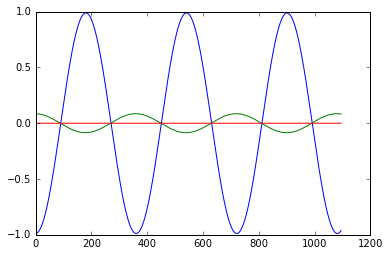

In [4]:
plt.plot(np.arange(len(x)),x)
plt.plot(np.arange(len(y)),y)
plt.plot(np.arange(len(z)),z)

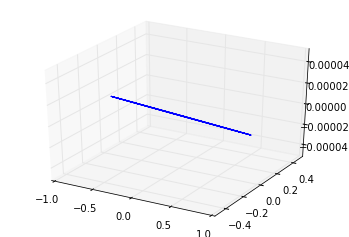

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(xs=x,ys=y)
ax.set_xlim(left=-1, right=1)
ax.set_ylim(bottom=-.5,top=.5)
ax.set_zlim(bottom=-.00005,top=.00005)
ax.mouse_init()

#ax.view_init(45, 45)
#for angle in range(0, 360):
#    ax.view_init(30, angle)
#    plt.draw()
#    plt.pause(.001)

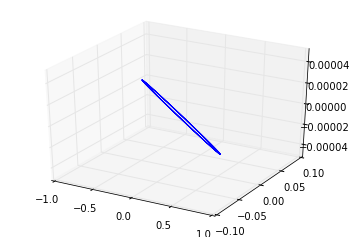

In [59]:
fig = plt.figure()

ax = fig.gca(projection='3d')

ax.plot(xs=x,ys=y)
ax.mouse_init()
ax.set_xlim(left=-1, right=1)
ax.set_ylim(bottom=-.1,top=.1)
ax.set_zlim(bottom=-.00005,top=.00005)

plt.show()